# Cube de données W43-MM1 en dcn

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [16]:
HDU = fits.open("/user/workdir/soldanof/ALMA/dcn-7-12m-contsub.fits")
cube = HDU[0].data
header = HDU[0].header

In [21]:
cube.shape

(115, 1344, 1440)

INFO: Auto-setting vmin to -1.672e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.565e-02 [aplpy.core]


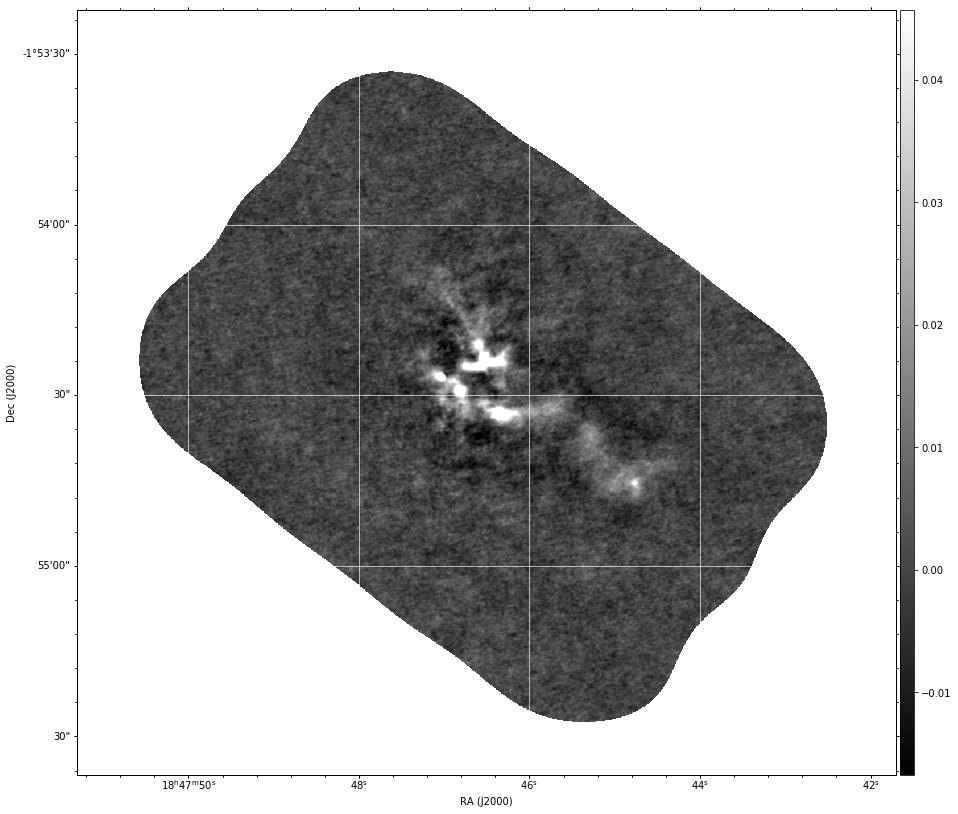

In [42]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/dcn-7-12m-contsub.fits",figure=fig_all,slices=[50])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [44]:
input1 = '/user/workdir/soldanof/ALMA/dcn-7-12m-contsub.fits'
output = '/user/workdir/soldanof/ALMA/dcn-7-12m-contsub_cut.fits'
coord = np.array([510,457,35,1105,833,80])
subfits(input1,output,coord)

Dimensions 596 377 46


In [45]:
HDU = fits.open("/user/workdir/soldanof/ALMA/dcn-7-12m-contsub_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -2.618e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.093e-01 [aplpy.core]


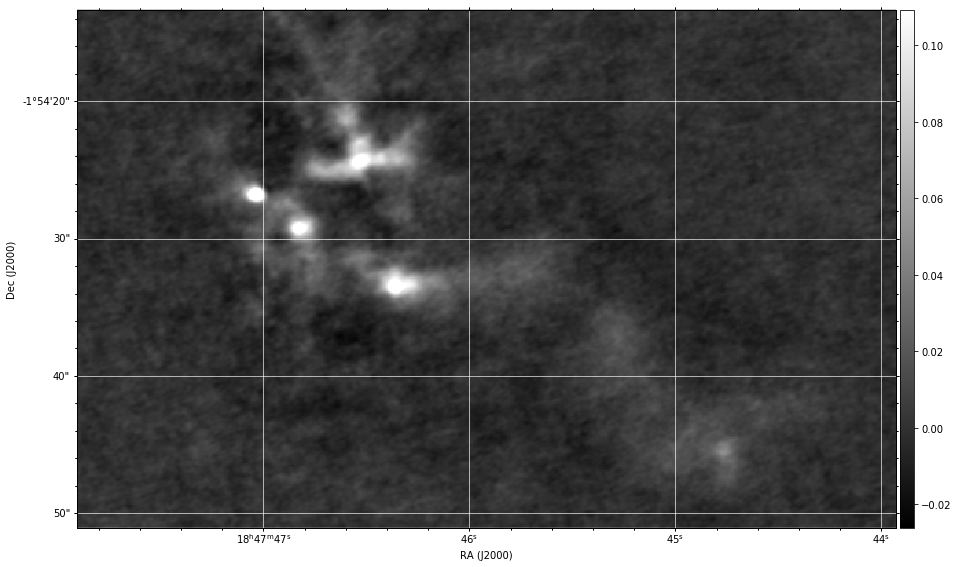

In [47]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/dcn-7-12m-contsub_cut.fits",figure=fig_all,slices=[15])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [48]:
cube.shape

(46, 377, 596)

In [105]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale((46, 700, 700))

wt, S11a, wave_k, S1a, q =  fan_trans(cube[15,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([700,700]))

#wt, S11a, wave_k, S1a, q =  fan_trans(cube[1,:,:], reso=reso, angular=False,q=q,apodize = 0.98)

  0%|          | 0/23 [00:00<?, ?it/s]

700 700


100%|██████████| 23/23 [00:32<00:00,  1.43s/it]


In [97]:
M = nb_scale(cube.shape)

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

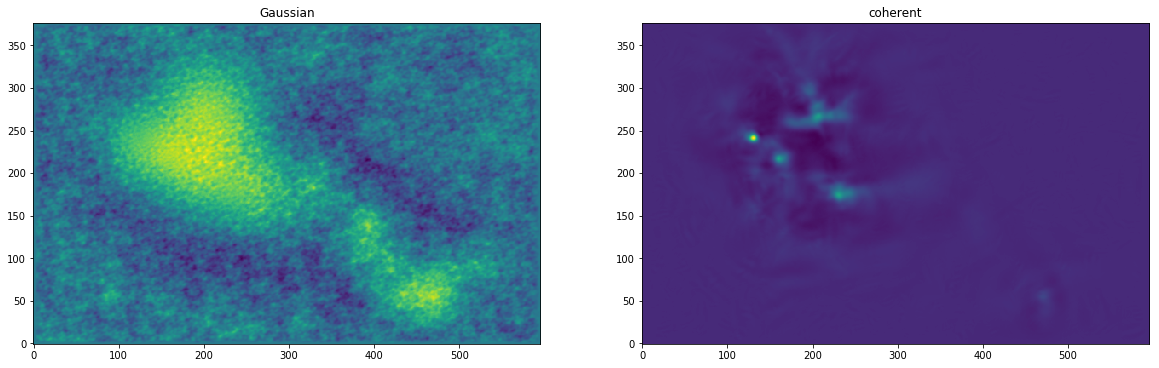

In [98]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

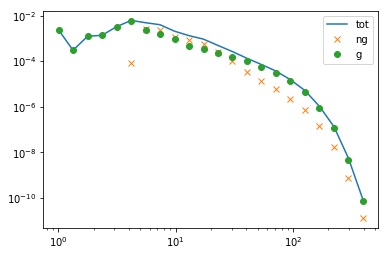

In [90]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [91]:
reso = header ['CDELT2']*60
M = nb_scale(cube.shape)
N = header['NAXIS3']

In [92]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale(cube.shape)
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98)

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/dcn/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/dcn/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/dcn/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/dcn/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/dcn/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/dcn/wave_k.npy",wave_k)

  0%|          | 0/22 [00:00<?, ?it/s]

data number 0


  0%|          | 0/22 [00:00<?, ?it/s]

data number 1


  0%|          | 0/22 [00:00<?, ?it/s]

data number 2


  0%|          | 0/22 [00:00<?, ?it/s]

data number 3


  0%|          | 0/22 [00:00<?, ?it/s]

data number 4


  0%|          | 0/22 [00:00<?, ?it/s]

data number 5


  0%|          | 0/22 [00:00<?, ?it/s]

data number 6


  0%|          | 0/22 [00:00<?, ?it/s]

data number 7


  0%|          | 0/22 [00:00<?, ?it/s]

data number 8


  0%|          | 0/22 [00:00<?, ?it/s]

data number 9


  0%|          | 0/22 [00:00<?, ?it/s]

data number 10


  0%|          | 0/22 [00:00<?, ?it/s]

data number 11


  0%|          | 0/22 [00:00<?, ?it/s]

data number 12


  0%|          | 0/22 [00:00<?, ?it/s]

data number 13


  0%|          | 0/22 [00:00<?, ?it/s]

data number 14


  0%|          | 0/22 [00:00<?, ?it/s]

data number 15


  0%|          | 0/22 [00:00<?, ?it/s]

data number 16


  0%|          | 0/22 [00:00<?, ?it/s]

data number 17


  0%|          | 0/22 [00:00<?, ?it/s]

data number 18


  0%|          | 0/22 [00:00<?, ?it/s]

data number 19


  0%|          | 0/22 [00:00<?, ?it/s]

data number 20


  0%|          | 0/22 [00:00<?, ?it/s]

data number 21


  0%|          | 0/22 [00:00<?, ?it/s]

data number 22


  0%|          | 0/22 [00:00<?, ?it/s]

data number 23


  0%|          | 0/22 [00:00<?, ?it/s]

data number 24


  0%|          | 0/22 [00:00<?, ?it/s]

data number 25


  0%|          | 0/22 [00:00<?, ?it/s]

data number 26


  0%|          | 0/22 [00:00<?, ?it/s]

data number 27


  0%|          | 0/22 [00:00<?, ?it/s]

data number 28


  0%|          | 0/22 [00:00<?, ?it/s]

data number 29


  0%|          | 0/22 [00:00<?, ?it/s]

data number 30


  0%|          | 0/22 [00:00<?, ?it/s]

data number 31


  0%|          | 0/22 [00:00<?, ?it/s]

data number 32


  0%|          | 0/22 [00:00<?, ?it/s]

data number 33


  0%|          | 0/22 [00:00<?, ?it/s]

data number 34


  0%|          | 0/22 [00:00<?, ?it/s]

data number 35


  0%|          | 0/22 [00:00<?, ?it/s]

data number 36


  0%|          | 0/22 [00:00<?, ?it/s]

data number 37


  0%|          | 0/22 [00:00<?, ?it/s]

data number 38


  0%|          | 0/22 [00:00<?, ?it/s]

data number 39


  0%|          | 0/22 [00:00<?, ?it/s]

data number 40


  0%|          | 0/22 [00:00<?, ?it/s]

data number 41


  0%|          | 0/22 [00:00<?, ?it/s]

data number 42


  0%|          | 0/22 [00:00<?, ?it/s]

data number 43


  0%|          | 0/22 [00:00<?, ?it/s]

data number 44


  0%|          | 0/22 [00:00<?, ?it/s]

data number 45


100%|██████████| 22/22 [00:37<00:00,  1.69s/it]


Text(0.5, 1.0, 'Coherent')

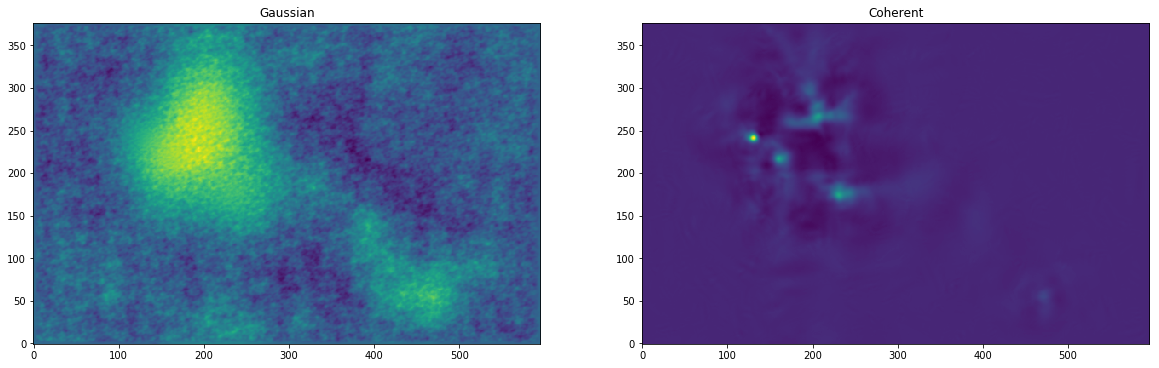

In [93]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/dcn/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/dcn/coh.npy")

subplot(1,2,1)
imshow(im_g[15].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[15].real,origin="lower")
title('Coherent')

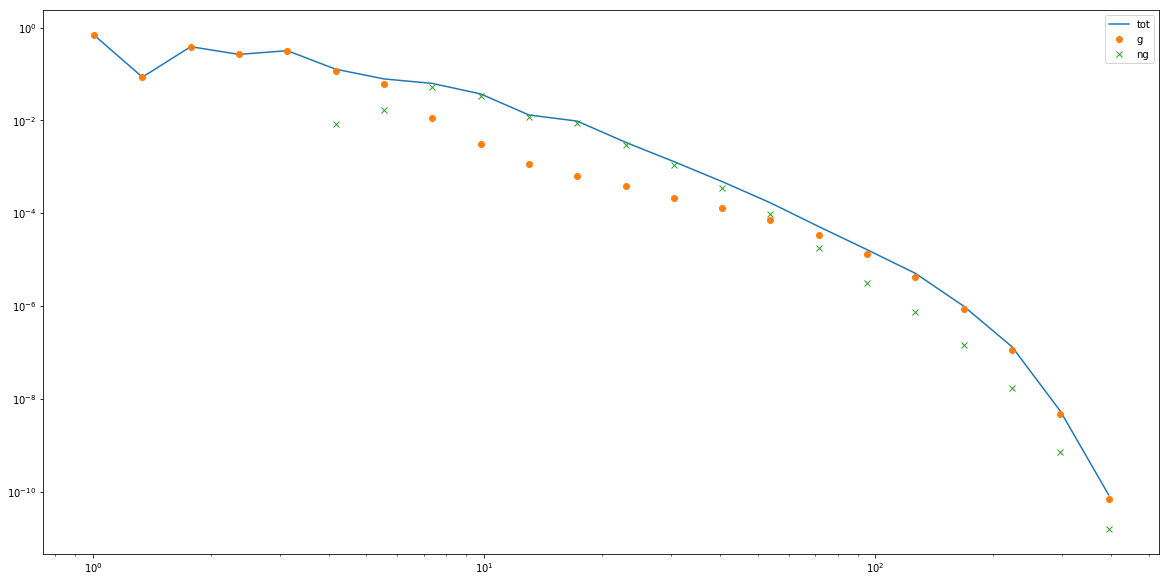

In [94]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/dcn/s1at.npy")
g = np.load("/user/workdir/soldanof/data/dcn/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/dcn/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/dcn/wave_k.npy")
plt.plot(wk, t[15],label="tot")
plt.plot(wk, g[15],"o",label="g")
plt.plot(wk, ng[15],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()